# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import os

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

644

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url+'longyearbyen').json()
response

{'cod': 429,
 'message': 'Your account is temporary blocked due to exceeding of requests limitation of your subscription type. Please choose the proper subscription http://openweathermap.org/price'}

In [4]:
# set lists for the dataframe
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []
city_id = []
city_2 = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        city_2.append(response["name"])
        print(f"Processing record for {city}/")
    except:
        print("City Not Found. Skipping...")
print("City check complete")

City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skip

City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skip

City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skipping...
City Not Found. Skip

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create a dictionary for establishing dataframe
weather_dict = {
     "City":city_2,
     "Cloudiness":cloudinesses,
     "Country":countries,
     "Date":dates,
     "Humidity":humidities,
     "Lat":lats,
     "Lng":lngs,
     "Max Temp":max_temps,
     "Wind Speed":wind_speeds
 }

#create dataframe
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [6]:
#output to csv
weather_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
humid_city = weather_df.loc[weather_df["Humidity"]>100, :]
humid_city

#No cities have humidity over 100%

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df[weather_df["City"].isin(humid_city)==False]
clean_city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

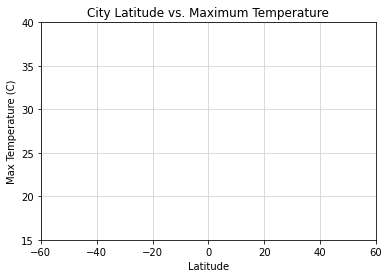

In [9]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.ylim(15,40)
plt.xlim(-60, 60)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

## Latitude vs. Humidity Plot

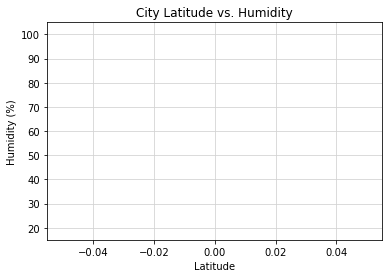

In [10]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

## Latitude vs. Cloudiness Plot

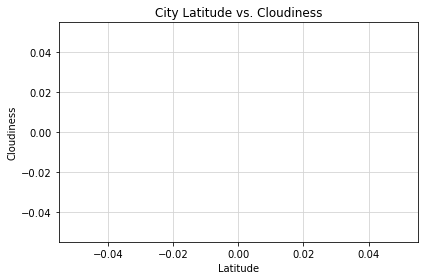

In [11]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.tight_layout()
plt.show()

## Latitude vs. Wind Speed Plot

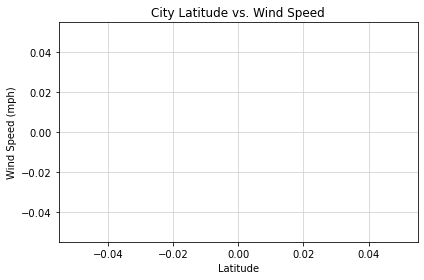

In [12]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.tight_layout()
plt.show()

## Linear Regression

In [ ]:
northern = clean_city_data.loc[clean_city_data["Lat"] >= 0, :]
southern = clean_city_data.loc[clean_city_data["Lat"] <= 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
x_values = northern["Lat"]
y_values = northern["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,270),fontsize=15,color="red")
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title('Latitude vs Max Temp (Northern Hemisphere)')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
x_values = southern["Lat"]
y_values = southern["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,270),fontsize=15,color="red")
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title('Latitude vs Max Temp (Southern Hemisphere)')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
x_values = northern["Lat"]
y_values = northern["Humidity %"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,270),fontsize=15,color="red")
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title('Latitude vs Max Temp (Northern Hemisphere)')
plt.style.use("classic")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
x_values = southern["Lat"]
y_values = southern["Humidity %"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,270),fontsize=15,color="red")
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title('Latitude vs Max Temp (Northern Hemisphere)')
plt.style.use("classic")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x_values = northern["Lat"]
y_values = northern["Cloudiness (%)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,270),fontsize=15,color="red")
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title('Latitude vs Max Temp (Northern Hemisphere)')
plt.style.use("classic")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x_values = southern["Lat"]
y_values = southern["Cloudiness (%)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,270),fontsize=15,color="red")
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title('Latitude vs Max Temp (Northern Hemisphere)')
plt.style.use("classic")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = northern["Lat"]
y_values = northern["Wind Speed (mph)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,270),fontsize=15,color="red")
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title('Latitude vs Max Temp (Northern Hemisphere)')
plt.style.use("classic")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = southern["Lat"]
y_values = southern["Wind Speed (mph)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,270),fontsize=15,color="red")
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title('Latitude vs Max Temp (Northern Hemisphere)')
plt.style.use("classic")